# User Overview Analysis

In [1]:
import os
import sys

In [18]:
sys.path.insert(0,'../scripts/')
sys.path.append(os.path.abspath(os.path.join('scripts')))
from clean_Telecom import DataCleaner 
from data_info import DataInfo

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('max_column', None)
df=pd.read_excel('../data/challenge_data_source.xlsx', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Top 10 Handset used

In [42]:
Device_type = df['Handset Type'].value_counts()[:10]
Device_type

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

# Top 3 Handset Manufacturers

In [43]:
device_manuf= df['Handset Manufacturer'].value_counts()[:3]
device_manuf

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

# Top 5 Handsets per Top 3 Manufacturers

<AxesSubplot:xlabel='Handset Type'>

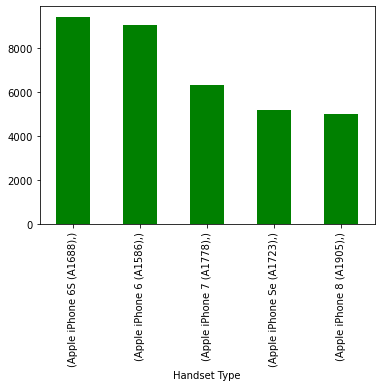

In [82]:
apple_df = df[df['Handset Manufacturer'] == 'Apple']
apple_df = apple_df.loc[:,['Handset Type']]
Top_apple = apple_df.value_counts()[:5]
Top_apple .plot.bar(x='Handset Type' ,stacked=True, color='green')

<AxesSubplot:xlabel='Handset Type'>

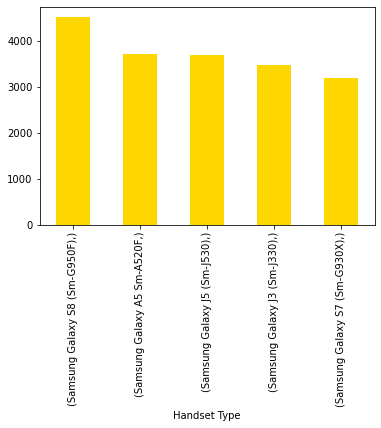

In [81]:
# top 5 samsung Handsets 
samsung_df = df[df['Handset Manufacturer'] == 'Samsung']
samsung_df = samsung_df.loc[:,['Handset Type']]
Top_samsung = samsung_df.value_counts()[:5]
Top_samsung .plot.bar(x='Handset Type' ,stacked=True, color='gold')

<AxesSubplot:xlabel='Handset Type'>

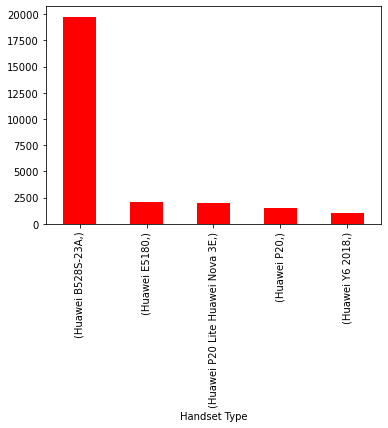

In [83]:
#top 5 Huawei
Huawei_df = df[df['Handset Manufacturer'] == 'Huawei']
Huawei_df = Huawei_df.loc[:,['Handset Type']]
Top_Huawei = Huawei_df.value_counts()[:5]
Top_Huawei
Top_Huawei .plot.bar(x='Handset Type' ,stacked=True, color='red')

In [59]:
topHandsetType = df.groupby(['Handset Type']).agg({'Handset Type': ['count']})
topHandsetType.columns = ['count']
topHandsetType = topHandsetType.reset_index()
topHandsetType.head()

,Handset Type,count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1


In [61]:
# so Grouping Top 5 handsets of all Manufacturers

topHandsetType = topHandsetType.nlargest(5, 'count')
topHandsetType = topHandsetType.reset_index(drop=True)
topHandsetType

,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326


<AxesSubplot:xlabel='Handset Type'>

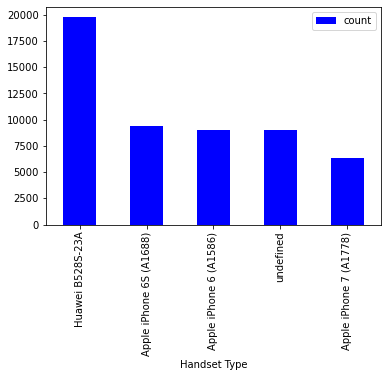

In [74]:
# so mostly used devices Huawei and Apple 
topHandsetType.plot.bar(x='Handset Type' ,stacked=True, color='blue')

# Intepretation and Recommendation

In [95]:
all= topHandsetType['count'].sum ()
Huawei= topHandsetType.iat[0, 1]
percentage = Huawei/all
print("Huawei B528S-23A accounts",{percentage*100},"% of the top 5 handset of all manufacturers ")


Huawei B528S-23A accounts {36.914796194890386} % of the top 5 handset of all manufacturers 


#### so, I would recommend the investor to sell more of Huawei B528S-23A and design a better infrastructure around this type of handset followed by Apple iphone 6, 6s and 7

# Understanding the Data

In [102]:
from data_info import DataInfo
explore = DataInfo(df)

In [111]:
explore.get_description()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.00,150000.00,150000.00,149431.00,148935.00,149429.00,122172.00,122189.00,150000.00,150000.00,61855.00,53352.00,149247.00,149247.00,149247.00,149247.00,149209.00,149209.00,149209.00,149209.00,68527.00,68191.00,150000.00,150000.00,150000.00,52463.00,57107.00,56415.00,19747.00,61684.00,38158.00,149246.00,149208.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150000.00,150000.00
mean,499.19,498.80,104608.56,208201639651672.22,41882819545.03,48474547977654.16,109.80,17.66,13300.05,1770.43,20809914.27,759658.66,92.84,3.07,1.72,1.61,98.53,0.78,0.15,0.08,114471023.70,3242301.38,1829176.87,1408879.97,104609105.55,989.70,340.43,810.84,149.26,965.46,141.30,3719.79,4022.08,1795321.77,32928.43,5750752.62,2056541.93,1791728.87,467373.44,11634072.50,11009410.13,11626851.72,11001754.82,422044702.60,8288398.11,421100544.19,8264799.42,41121206.29,454643430.08
std,288.61,288.10,81037.62,21488090841.37,2447443358621.66,22416372027957.65,619.78,84.79,23971.88,4625.36,182566527.91,26453047.17,13.04,6.22,4.16,4.83,4.63,3.23,1.62,1.30,963194563.98,19570643.17,5696395.47,4643230.60,81037611.58,2546.52,1445.37,1842.16,1219.11,1946.39,993.35,9171.61,10160.32,1035482.28,19006.18,3309097.02,1189916.93,1035839.51,269969.31,6710568.85,6345423.35,6725218.03,6359489.76,243967494.35,4782699.66,243205009.81,4769003.69,11276386.51,244142874.38
min,0.00,0.00,7142.00,204047108489451.00,33601001722.00,440015202000.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,40.00,0.00,0.00,7142988.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,2516.00,59.00,3290.00,148.00,2866892.00,7114041.00
25%,250.00,251.00,57440.50,208201401263249.00,33651295581.50,35460708865439.00,32.00,2.00,43.00,47.00,35651.50,4694.75,91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,112403.50,24322.00,14877.75,21539.75,57440785.25,20.00,10.00,26.00,2.00,39.00,3.00,87.00,106.00,899148.00,16448.00,2882393.00,1024279.00,892793.00,233383.00,5833501.00,5517965.00,5777156.00,5475981.00,210473253.00,4128476.00,210186872.00,4145943.00,33222010.50,243106803.00
50%,499.00,500.00,86399.00,208201546329113.00,33663706799.00,35722009426311.00,45.00,5.00,63.00,63.00,568730.00,20949.50,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,1941949.00,229733.00,39304.50,46793.50,86399983.00,128.00,52.00,164.00,8.00,288.00,8.00,203.00,217.00,1794369.00,32920.00,5765829.00,2054573.00,1793505.00,466250.00,11616019.00,11013447.00,11642217.00,10996384.00,423408104.00,8291208.00,421803006.00,8267071.00,41143312.00,455841077.50
75%,749.00,750.00,132430.25,208201771619103.00,33683490769.00,86119704674953.00,70.00,15.00,19710.75,1120.00,3768308.50,84020.25,100.00,4.00,1.00,0.00,100.00,0.00,0.00,0.00,25042903.50,1542827.00,679609.50,599095.25,132430782.00,693.50,203.00,757.00,35.00,1092.00,31.00,2650.00,2451.00,26

# Task1.1

In [96]:
#CDR or Call Detail Record is the voice channel. XDR is the data channel.difference is that CDRs encode 
#2 phone numbers and two antennas (in and out) for a call, while XDRs only contain one antenna
#(the one you're connected to and downloading information)... no "out" antenna or "out" phone number is nedded

In [101]:
import os, sys
import pandas as pd
import numpy as np
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')
from data_info import DataInfo

In [110]:
explore.get_basic_description()

The DataFrame containes 150001 rows and 55 columns.
Current DataFrame Memory Usage:
98683855
Current DataFrame Memory Usage of columns is :
DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Nu

In [106]:
# we have got 3 dtypes float64, object and datetime64
explore.df.describe(include='object').columns.to_list()


['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [107]:
explore.df.describe(include='datetime64').columns.to_list()

['Start', 'End']

In [119]:
aggs_by_cols = pd.set_option('display.float_format', '{:.2f}'.format)

In [127]:
aggs_by_col = {'Bearer Id': 'count', 
               'Dur. (ms)': 'sum',
               'Total UL (Bytes)': 'sum',
               'Total DL (Bytes)': 'sum',
               'Social Media DL (Bytes)': 'sum',
               'Social Media UL (Bytes)': 'sum',
               'Google DL (Bytes)': 'sum',
               'Google UL (Bytes)': 'sum',
               'Email DL (Bytes)': 'sum',
               'Email UL (Bytes)': 'sum',
               'Youtube DL (Bytes)': 'sum',
               'Youtube UL (Bytes)': 'sum',
               'Netflix DL (Bytes)': 'sum',
               'Netflix UL (Bytes)': 'sum',
               'Gaming DL (Bytes)': 'sum',
               'Gaming UL (Bytes)': 'sum',
               'Other DL (Bytes)': 'sum',
               'Other UL (Bytes)': 'sum',
               'Gaming DL (Bytes)': 'sum',
               'Gaming UL (Bytes)': 'sum',
               }

agree = df.groupby('MSISDN/Number').agg(aggs_by_col)
agree

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
33601001722.00,1,116720.00,36053108.00,842637466.00,2206504.00,25631.00,3337123.00,1051882.00,837400.00,493962.00,14900201.00,6724347.00,10265105.00,16915876.00,811091133.00,1367528.00,377096990.00,9473882.00
33601001754.00,1,181230.00,36104459.00,120755184.00,2598548.00,62017.00,4197697.00,1137166.00,2828821.00,478960.00,5324251.00,7107972.00,770569.00,10451194.00,105035298.00,14714780.00,279557701.00,2152370.00
33601002511.00,1,134969.00,39306820.00,556659663.00,3148004.00,47619.00,3343483.00,99643.00,2436500.00,768880.00,2137272.00,19196298.00,16525919.00,2827981.00,529068485.00,9759228.00,495086501.00,6607171.00
33601007832.00,1,49878.00,20327526.00,401993172.00,251469.00,28825.00,5937765.00,3740728.00,2178618.00,106052.00,4393123.00,2584198.00,1157362.00,784730.00,388074835.00,3051292.00,25248001.00,10031701.00
33601008617.00,2,37104.00,94280527.00,1363130417.00,2861230.00,51312.00,13728668.00,4770948.00,2247808.00,1057661.00,10339971.00,31193031.00,24971647.00,24230077.00,1308981093.00,5816727.00,777643713.00,27160771.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789996170.00,1,8810.00,26716429.00,687925212.00,234320.00,65863.00,6834178.00,697091.00,480946.00,525969.00,8294310.00,18353533.00,14754741.00,147797.00,657326717.00,3034642.00,291391283.00,3891534.00
33789997247.00,1,140988.00,35732243.00,444575092.00,442214.00,56355.00,1472406.00,3957299.00,2513433.00,664.00,5596862.00,14254710.00,6929961.00,1601099.00,427620216.00,9383076.00,204636073.00,6479040.00
3197020876596.00,1,877385.00,37295915.00,194828056.00,668596.00,46628.00,8572779.00,1865881.00,842279.00,678492.00,9839889.00,2120016.00,10340908.00,16251392.00,164563605.00,13485133.00,467678100.00,2848373.00


# Data Cleaning and Maniputlation

In [156]:
from data_info import DataInfo
from clean_Telecom import DataCleaner
cleaner = DataCleaner(explore.df)

In [141]:
col_with_singlevalue= explore.get_dataframe_columns_unique_value_count()
col_with_singlevalue


,Unique Value Count
UL TP > 300 Kbps (%),64
50 Kbps < UL TP < 300 Kbps (%),69
250 Kbps < DL TP < 1 Mbps (%),74
50 Kbps < DL TP < 250 Kbps (%),85
DL TP > 1 Mbps (%),86
10 Kbps < UL TP < 50 Kbps (%),86
UL TP < 10 Kbps (%),99
DL TP < 50 Kbps (%),101
Handset Manufacturer,171
Avg RTT UL (ms),723


In [148]:
cleaner.drop_columns_of_single_vlaues(col_with_singlevalue)

In [149]:
#convert bites to megabites
cleaner.bytes_to_megabytes(['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'])

failed to convert to MB


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,3330.00,37882.00,1321509685.00,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,81230.00,208202201200072.00,33650688697.00,35483109451938.00,D20434A,32.00,0.00,52.00,65.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,42376.00,41915.00,81230763.00,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.00,229.00,3.46,0.05,9.97,2.82,0.06,0.63,16.19,11.76,17.88,19.68,526.61,9.20,3.26,13.49,57.63,574.18
149997,7349883264234609664,2019-04-29 07:28:42,483.00,2019-04-30 10:4

In [170]:
#filter out duplicated files
cleaner.remove_duplicates()

In [171]:
#fix missing values
explore = DataInfo(cleaner.df)
explore.get_columns_with_missing_values()

['Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total UL (MegaBytes

In [172]:
explore.get_total_missing_values()

The total number of missing values is 1030401
12.49 % missing values.


1030401

In [173]:
#disintegrate this missing values with respect to each column in percentage
explorer.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Bearer Id,0,0.0 %
Start,1,0.0 %
Start ms,1,0.0 %
End,1,0.0 %
End ms,1,0.0 %
Dur. (ms),1,0.0 %
IMSI,570,0.38 %
MSISDN/Number,1066,0.71 %
IMEI,572,0.38 %
Last Location Name,1153,0.77 %


In [174]:
#list out columns with missing values greater than 40% since if more than 40% data 
#are missing in important variables then results should only be considered as hypothesis generating
explore.get_columns_missing_percentage_greater_than (40.0)

Index(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B'],
      dtype='object')

In [177]:
cleaner.drop_unwanted_columns(explorer.get_columns_missing_percentage_greater_than(30.0))
cleaner.df.shape

(150001, 45)

In [178]:
cleaner.fill_numeric_values(explorer.get_columns_with_missing_values())
cleaner.df.sample(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
75106,7349883248249459712,2019-04-24 11:07:04,997.00,2019-04-28 20:19:39,446.00,378754.00,208201008857256.00,33760886293.00,35405309404879.00,T93145A,24.00,1.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,94.00,378754449.00,Samsung,Samsung Galaxy J5 (Sm-J530),238.00,244.00,2.25,0.06,7.06,2.34,3.17,0.46,7.04,8.01,8.54,8.38,211.89,11.20,614.91,12.90,43.35,239.94
15134,7277825655762939904,2019-04-24 18:50:16,281.00,2019-04-25 04:33:53,691.00,35017.00,208201909812075.00,33662671306.00,35813809860496.00,9164566995006720,47.00,3.00,208.00,182.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,11124.00,11058.00,35017410.00,Samsung,Samsung Galaxy S8 (Sm-G950F),36.00,32.00,1.48,0.03,10.75,0.38,0.97,0.28,13.03,16.89,22.65,1.00,283.57,7.18,729.61,5.09,30.85,332.45
55714,13114483557333999616,2019-04-25 16:16:05,787.00,2019-04-27 04:07:12,252.00,129066.00,208201711565188.00,33762278643.00,35573607758219.00,L70084C,44.00,5.00,23.00,40.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,31653.00,35988.00,129066465.00,Apple,Apple iPhone 6S Plus (A1687),135.00,139.00,1.37,0.02,3.80,3.35,3.47,0.25,13.11,2.15,19.06,18.59,370.31,4.88,493.31,2.29,31.53,411.11
108513,13042425972586899456,2019-04-27 15:36:01,915.00,2019-04-29 05:17:06,679.00,135664.00,208201715351024.00,33630357948.00,35155509421664.00,D93730B,67.00,0.00,56.00,21.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,711.00,697.00,135664764.00,Samsung,Samsung Galaxy A5 Sm-A520F,2.00,3.00,2.23,0.02,9.51,3.29,2.20,0.89,10.89,21.22,7.54,13.42,82.19,13.89,762.63,13.95,66.67,114.56
45289,7349883251085979648,2019-04-25 06:49:51,81.00,2019-04-26 00:28:54,391.00,63543.00,208201546406157.00,33661915835.00,35306709792311.00,T50308C,48.00,1.00,44.00,47.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,18526.00,19369.00,63543310.00,Apple,Apple iPhone Se (A1723),69.00,69.00,3.54,0.06,4.75,0.25,1.91,0.30,12.59,20.76,20.82,0.13,77.32,5.72,813.62,11.16,38.39,120.92
16671,13042425959306500096,2019-04-24 19:16:09,801.00,2019-04-25 02:28:48,571.00,25958.00,208202201267140.00,33783833099.00,86546404409773.00,D42393B,27.00,18.00,8567.00,1496.00,97.00,1.00,0.00,0.00,98.00,1.00,0.00,0.00,2166381.00,2059168.00,25958770.00,undefined,undefined,2976.00,2909.00,0.39,0.05,8.76,1.03,1.55,0.17,13.24,7.61,0.99,5.85,145.32,1.75,838.51,8.18,24.64,170.25
81474,13114483565143699456,2019-04-27 09:09:26,545.00,2019-04-28 00:54:37,314.00,56710.00,208201908553036.00,33678943775.00,35904208851135.00,D50127B,45.00,5.00,39.00,53.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,11648.00,15144.00,56710769.00,Samsung,Samsung Galaxy S8 (Sm-G950F),61.00,66.00,0.41,0.03,2.68,0.38,1.72,0.79,2.87,16.45,16.53,11.19,427.30,13.21,615.92,12.19,54.25,451.50
133254,13042425982052999168,2019-04-28 18:11:16,518.00,2019-04-30 03:19:38,3.00,119301.00,208201715272168.00,33699115066.00,86376903257223.00,T79727A,92.00,64.00,21033.00,9211.00,68.00,12.00,10.00,7.00,98.00,1.00,0.00,0.00,7619357.00,6347436.00,119301485.00,Huawei,Huawei B528S-23A,14587.00,16419.00,0.94,0.04,7.54,2.24,0.08,0.09,8.07,4.37,23.00,10.34,506.47,11.49,365.42,3.70,32.25,546.10
147780,7349883264183749632,2

In [181]:
cleaner.fill_non_numeric_values(explorer.get_columns_with_missing_values(), fwd_fill=True, bwd_fill=True)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,undefined,undefined,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,81230.00,208202201200072.00,33650688697.00,35483109451938.00,D20434A,32.00,0.00,52.00,65.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,42376.00,41915.00,81230763.00,Apple,Apple iPhone 8 Plus (A1897),223.00,229.00,3.46,0.05,9.97,2.82,0.06,0.63,16.19,11.76,17.88,19.68,526.61,9.20,3.26,13.49,57.63,574.18
149997,7349883264234609664,2019-04-29 07:28:42,483.00,2019-04-30 10:41:33,187.00,97970.00,208201908153249.00,33663449963.00,35660508296467.00,D10223C,27.00,2.00,23.00,54.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,17264.00,16759.00,97970704.00,Apple,Apple iPhone Se (A1723),105.00,102.00,2.34,0.01,2.23,2.19,1.95,0.17,13.88,8.29,19.35,21.29,626.89,4.74,712.18,2.46,39.14,666.65
149998,13114483573367300096,2019-04-29 07:28:43,283.00,2019-04-30 10:46:12,810.00,98249.00,208201711161187.00,33621890103.00,35721209870907.00,T51102A,43.00,6.00,43.00,47.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,25003.00,28640.00,98249527.00,Apple,Apple iPhone 

# Adding the Merged Fields and splitting columns

In [182]:
#spliting date-time value to separate date and time columns for each start and end. 
cleaner.separate_date_time_column('Start', 'start')
cleaner.separate_date_time_column('End', 'end')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),start_date,start_time,end_date,end_time
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88,2019-04-04,12:01:18,2019-04-25,14:35:31
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38,2019-04-09,13:04:04,2019-04-25,08:15:48
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81,2019-04-09,17:42:11,2019-04-25,11:58:13
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,undefined,undefined,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03,2019-04-10,00:31:25,2019-04-25,07:36:35
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14,2019-04-12,20:10:23,2019-04-25,10:40:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,81230.00,208202201200072.00,33650688697.00,35483109451938.00,D20434A,32.00,0.00,52.00,65.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,42376.00,41915.00,81230763.00,Apple,Apple iPhone 8 Plus (A1897),223.00,229.00,3.46,0.05,9.97,2.82,0.06,0.63,16.19,11.76,17.88,19.68,526.61,9.20,3.26,13.49,57.63,574.18,2019-04-29,07:28:42,2019-04-30,06:02:33
149997,7349883264234609664,2019-04-29 07:28:42,483.00,2019-04-30 10:41:33,187.00,97970.00,208201908153249.00,33663449963.00,35660508296467.00,D10223C,27.00,2.00,23.00,54.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,17264.00,16759.00,97970704.00,Apple,Apple iPhone Se (A1723),105.00,102.00,2.34,0.01,2.23,2.19,1.95,0.17,13.88,8.29,19.35,21.29,626.89,4

AttributeError: 'DataCleaner' object has no attribute 'create_new_columns_from'

In [184]:
# Changing the specified columns to category type using cleaners function
cleaner.change_columns_type_to(['IMSI','Handset Manufacturer','Handset Type','IMEI','MSISDN/Number','Bearer Id'],'category')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),start_date,start_time,end_date,end_time
0,13114483460844900352,2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88,2019-04-04,12:01:18,2019-04-25,14:35:31
1,13114483482878900224,2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38,2019-04-09,13:04:04,2019-04-25,08:15:48
2,13114483484080500736,2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81,2019-04-09,17:42:11,2019-04-25,11:58:13
3,13114483485442799616,2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,undefined,undefined,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03,2019-04-10,00:31:25,2019-04-25,07:36:35
4,13114483499480700928,2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14,2019-04-12,20:10:23,2019-04-25,10:40:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,81230.00,208202201200072.00,33650688697.00,35483109451938.00,D20434A,32.00,0.00,52.00,65.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,42376.00,41915.00,81230763.00,Apple,Apple iPhone 8 Plus (A1897),223.00,229.00,3.46,0.05,9.97,2.82,0.06,0.63,16.19,11.76,17.88,19.68,526.61,9.20,3.26,13.49,57.63,574.18,2019-04-29,07:28:42,2019-04-30,06:02:33
149997,7349883264234609664,2019-04-29 07:28:42,483.00,2019-04-30 10:41:33,187.00,97970.00,208201908153249.00,33663449963.00,35660508296467.00,D10223C,27.00,2.00,23.00,54.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,17264.00,16759.00,97970704.00,Apple,Apple iPhone Se (A1723),105.00,102.00,2.34,0.01,2.23,2.19,1.95,0.17,13.88,8.29,19.35,21.29,626.89,4

In [186]:
#convert to hour
def ms_to_hr(col:pd.Series):
    convertion_value = 1 / (1000 * 60 * 60)
    return col * convertion_value
cleaner.standardized_column(['Dur. (ms)','Dur. (ms).1'], ['Dur. (hr)','Total Duration (hr)'], ms_to_hr)

#convert to second
def ms_to_sec(col:pd.Series):
    convertion_value = 1 / 1000
    return col * convertion_value
cleaner.standardized_column(['Start ms','End ms','Activity Duration DL (ms)','Activity Duration UL (ms)'],['Start sec','End sec','Activity Duration DL (sec)','Activity Duration UL (sec)'], ms_to_sec)

,Bearer Id,Start,Start sec,End,End sec,Dur. (hr),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (sec),Activity Duration UL (sec),Total Duration (hr),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),start_date,start_time,end_date,end_time
0,13114483460844900352,2019-04-04 12:01:18,0.77,2019-04-25 14:35:31,0.66,0.51,208201448079117.00,33664962239.00,35521209507511.00,9164566995485190,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37.62,38.79,506.57,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1.55,0.02,1.63,1.27,3.56,0.14,15.85,2.50,8.20,9.66,278.08,14.34,171.74,8.81,36.75,308.88,2019-04-04,12:01:18,2019-04-25,14:35:31
1,13114483482878900224,2019-04-09 13:04:04,0.24,2019-04-25 08:15:48,0.61,0.38,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.17,3.56,379.20,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1.93,0.01,3.49,0.92,0.63,0.31,20.25,19.11,18.34,17.23,608.75,1.17,526.90,15.06,53.80,653.38,2019-04-09,13:04:04,2019-04-25,08:15:48
2,13114483484080500736,2019-04-09 17:42:11,0.00,2019-04-25 11:58:13,0.65,0.38,208200314458056.00,33760627129.00,35281510359387.00,D42335A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,378.27,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1.68,0.04,8.54,1.69,2.69,0.67,19.73,14.70,17.59,6.16,229.58,0.40,410.69,4.22,27.88,279.81,2019-04-09,17:42:11,2019-04-25,11:58:13
3,13114483485442799616,2019-04-10 00:31:25,0.49,2019-04-25 07:36:35,0.17,0.37,208201402342131.00,33750343200.00,35356610164913.00,T21824A,45.00,5.00,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3.33,37.88,367.09,undefined,undefined,17.00,207.00,0.64,0.01,9.02,2.79,1.44,0.63,21.39,15.15,13.99,1.10,799.54,10.85,749.04,12.80,43.32,846.03,2019-04-10,00:31:25,2019-04-25,07:36:35
4,13114483499480700928,2019-04-12 20:10:23,0.57,2019-04-25 10:40:32,0.95,0.30,208201401415120.00,33699795932.00,35407009745539.00,D88865A,45.00,5.00,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,302.50,Samsung,Samsung Sm-G390F,607.00,604.00,0.86,0.05,6.25,1.50,1.94,0.17,15.26,18.96,17.12,0.42,527.71,3.53,550.71,13.91,38.54,569.14,2019-04-12,20:10:23,2019-04-25,10:40:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,0.45,2019-04-30 06:02:33,0.21,0.02,208202201200072.00,33650688697.00,35483109451938.00,D20434A,32.00,0.00,52.00,65.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,42.38,41.91,22.56,Apple,Apple iPhone 8 Plus (A1897),223.00,229.00,3.46,0.05,9.97,2.82,0.06,0.63,16.19,11.76,17.88,19.68,526.61,9.20,3.26,13.49,57.63,574.18,2019-04-29,07:28:42,2019-04-30,06:02:33
149997,7349883264234609664,2019-04-29 07:28:42,0.48,2019-04-30 10:41:33,0.19,0.03,208201908153249.00,33663449963.00,35660508296467.00,D10223C,27.00,2.00,23.00,54.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,17.26,16.76,27.21,Apple,Apple iPhone Se (A1723),105.00,102.00,2.34,0.01,2.23,2.19,1.95,0.17,13.88,8.29,19.35,21.29,626.89,4.74,712.18,2.46,39.14,666.65,2019-04-29,07:28:42,2019-04-30,10:41:33
149998,13114483573367300096,2019-04-29 07:28:43,0.28,2019-0

# Save Generated Data

In [188]:
cleaner.optimize_data()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  category      
 1   Start                           150001 non-null  datetime64[ns]
 2   Start sec                       150001 non-null  float32       
 3   End                             150001 non-null  datetime64[ns]
 4   End sec                         150001 non-null  float32       
 5   Dur. (hr)                       150001 non-null  float32       
 6   IMSI                            150001 non-null  category      
 7   MSISDN/Number                   150001 non-null  category      
 8   IMEI                            150001 non-null  category      
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float32

In [189]:
#save the final cleaned csv data
cleaner.save_clean_data('../data/teleCo_clean_data.csv')